## Linear regression



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('Salary_Data.csv')

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


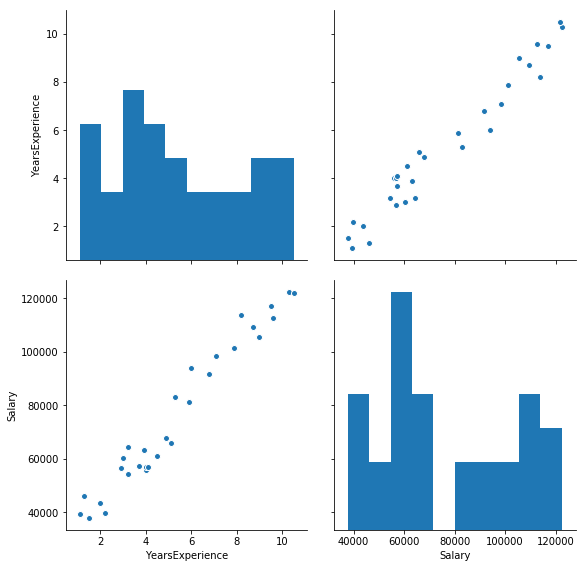

In [5]:
sns.pairplot(dataset,size=4)

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

## Train Test Split

In [7]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Creating and Training model

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evalution

In [9]:
# print the intercept
print(lm.intercept_)

26816.192244031183


In [10]:
coeff_df = pd.DataFrame(lm.coef_,dataset[['YearsExperience']].columns,columns=['Coefficient'])
coeff_df

,Coefficient
YearsExperience,9345.942443


## Model Evalution

In [11]:
predictions = lm.predict(X_test)

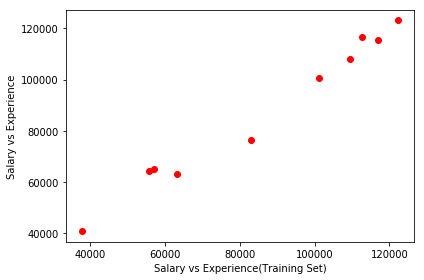

In [21]:
plt.scatter(y_test,predictions,color='r')
plt.xlabel('Salary vs Experience(Training Set)')
plt.ylabel('Salary vs Experience')
plt.tight_layout()

c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


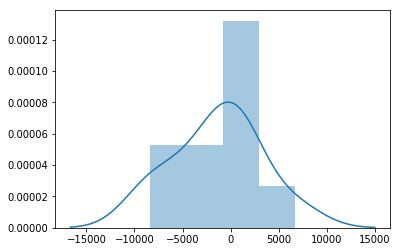

In [13]:
sns.distplot((y_test-predictions));

## Regression Evaluation Metrics

In [14]:
from sklearn import metrics

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3426.4269374307078
MSE: 21026037.329511296
RMSE: 4585.4157204675885
